# Plotting of figures for the theory chapter

This notebook will plot the figures that are used in the theory chapter of the thesis.

This first code block simply defines a function for figuring out if we are in a notebook or the notebook has been converted to a python script and is being run on the command line. 
It also imports the required modules for the plotting of the data, and sets the `rcParams` desired such that the plots are consistant. 

In [1]:
def in_ipynb():
    try:
        if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
            return True
        else:
            return False
    except NameError:
        return False

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.gridspec as gridspec
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

sns.set(palette='colorblind')
if in_ipynb():
    sys.path.insert(0, '../reports/code_blocks/')
else:
    sys.path.insert(0, 'reports/code_blocks/')
import reflectometry as refl

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.edgecolor'] = 'k'

This plot shows the reflectometry profile that arises from the kinematic method for calculating reflectometry. 
It is clear that at low-*q*, the method breaks down as *R* is greater than 1. 

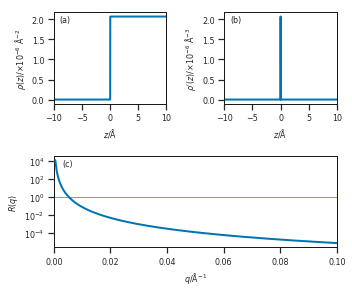

In [2]:
x = np.arange(-10, 10, 0.01)
y = np.ones_like(x) * 2.0719e-6
for i in range(0, len(x)):
    if x[i] < 0:
        y[i] = 0

x2 = np.array(x[:-1])
y2 = np.array(x[:-1])
for i in range(0, len(x)-1):
    y2[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])

q = np.arange(0.0005, 0.101, 0.0005)
r = np.zeros_like(q)
for i in range(0, len(q)):
    r[i] = np.sum((y2 * np.exp(-1j * x2 * q[i])) ** 2)
    r[i] *= 16 * np.pi ** 2
    r[i] /= q[i] ** 4

plt.figure(figsize=(5, 25/6))
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
ax.plot(x, y*1e6)
ax.set_xlabel(r'$z$/Å')
ax.set_ylabel(r'$\rho(z)$/$\times10^{-6}$ Å$^{-2}$')
ax.set_xlim([-10, 10])
ax.set_xticks(np.arange(-10, 15, 5))
ax.text(0.1, 0.92, '(a)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax = plt.subplot(gs[0, 1])
ax.plot(x2, y2*1e4)
ax.set_xlabel(r'$z$/Å')
ax.set_ylabel(r"$\rho'(z)$/$\times10^{-6}$ Å$^{-3}$")
ax.set_xlim([-10, 10])
ax.set_xticks(np.arange(-10, 15, 5))
ax.text(0.1, 0.92, '(b)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax = plt.subplot(gs[1, :])
ra = refl.abeles(q, np.array([0, 2.0719e-6]), np.array([10, 10]))
ax.plot(q, r * ra[-1]/r[-1], zorder=10)
ax.plot(q, np.ones_like(q), lw=1)
ax.set_xlabel(r'$q$/Å$^{-1}$')
ax.set_ylabel(r'$R(q)$')
ax.text(0.05, 0.92, '(c)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax.set_yscale('log')
ax.set_xlim([0, 0.1])
plt.tight_layout()
if in_ipynb():
    plt.show()
else:
    plt.savefig('reports/figures/theory/kine.pdf')
    plt.close()

This plot compares the kinematic with the dynamical approach. 
Showing that the dynamical approach does not voilate the prequisit of reflectometry. 

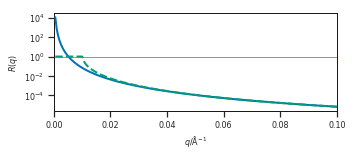

In [3]:
x = np.arange(-10, 10, 0.01)
y = np.ones_like(x) * 2.0719e-6
for i in range(0, len(x)):
    if x[i] < 0:
        y[i] = 0
        
x2 = np.array(x[:-1])
y2 = np.array(x[:-1])
for i in range(0, len(x)-1):
    y2[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    
q = np.arange(0.0005, 0.101, 0.0005)
r = np.zeros_like(q)
for i in range(0, len(q)):
    r[i] = np.sum((y2 * np.exp(-1j * x2 * q[i])) ** 2)
    r[i] *= 16 * np.pi ** 2
    r[i] /= q[i] ** 4

plt.figure(figsize=(5, 25/11))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, :])
ra = refl.abeles(q, np.array([0, 2.0719e-6]), np.array([10, 10]))
ax.plot(q, ra, '--', zorder=10, c='#029E73')
ax.plot(q, r * ra[-1]/r[-1], zorder=9, c='#0173B2')
ax.plot(q, np.ones_like(q), c='#DE8F05', lw=1)
ax.set_xlabel(r'$q$/Å$^{-1}$')
ax.set_ylabel(r'$R(q)$')
ax.set_yscale('log')
ax.set_xlim([0, 0.1])
plt.tight_layout()
if in_ipynb():
    plt.show()
else:
    plt.savefig('reports/figures/theory/dyna.pdf')
    plt.close()

This plot represents the length scales that can be probed in reciprocal space.

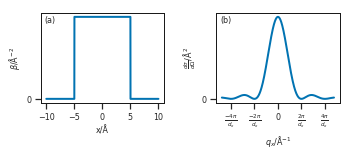

In [4]:
x = np.arange(-10, 10, 0.005)
beta = np.zeros_like(x)
beta[np.where((x >= -5) & (x < 5))] = 1
qx = np.arange(-1.5, 1.5, 0.001)
dsc = np.zeros_like(qx)
for i, q in enumerate(qx):
    dsc[i] = np.sum(beta * np.exp(1j * q * x)) ** 2
plt.figure(figsize=(5, 25/11))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
ax.plot(x,beta)
ax.set_yticks([0])
ax.set_xlabel(r'x/Å')
ax.set_ylabel(r'$\beta/$Å$^{-2}$')
ax.text(0.075, 0.92, '(a)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax = plt.subplot(gs[0, 1])
ax.plot(qx, dsc)
ax.set_yticks([0])
ax.set_xticks([-1.2566, -0.6283, 0, 0.6283, 1.2566])
ax.set_xticklabels([r'$\frac{-4\pi}{d_x}$', r'$\frac{-2\pi}{d_x}$', 0, r'$\frac{2\pi}{d_x}$', r'$\frac{4\pi}{d_x}$'])
ax.set_xlabel(r'$q_x$/Å$^{-1}$')
ax.set_ylabel(r'$\frac{d\sigma}{d\Omega}$/Å$^{2}$')
ax.text(0.075, 0.92, '(b)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
plt.tight_layout()
if in_ipynb():
    plt.show()
else:
    plt.savefig('reports/figures/theory/scales.pdf')
    plt.close()

This plot shows the Guinier analysis method in action. 

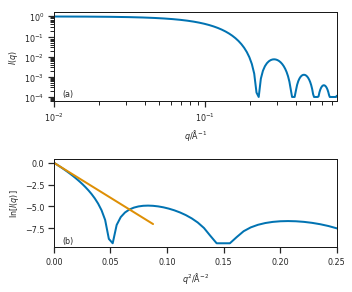

In [5]:
def sphere(r, q):
     return np.square(np.divide((3 * (np.sin(q * r) - q * r * np.cos(q * r))), np.power((q * r), 3)))

q = np.linspace(0.001, 0.75, 100)
i = sphere(20, q)
i[np.where(i<0.0001)] = 0.0001
plt.figure(figsize=(5, 25/6))
gs = gridspec.GridSpec(2, 1)
ax = plt.subplot(gs[0, 0])
ax.plot(q, i)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$q$/Å$^{-1}$')
ax.set_ylabel(r'$I(q)$')
ax.set_xlim(0.01, 0.75)
ax.text(0.05, 0.08, '(a)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes, size=8)
ax1 = plt.subplot(gs[1, 0])
ax1.plot(q * q, np.log(i))
ax1.plot(q[:40] * q[:40], -((20 * np.sqrt(3 / 5)) ** 2 / 3) * q[:40] * q[:40])
ax1.set_xlim(0.0, 0.25)
ax1.set_xlabel(r'$q^2$/Å$^{-2}$')
ax1.set_ylabel(r'ln[$I(q)$]')
ax1.text(0.05, 0.08, '(b)',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax1.transAxes, size=8)
plt.tight_layout()
if in_ipynb():
    plt.show()
else:
    plt.savefig('reports/figures/theory/rg.pdf')
    plt.close()

This plot compares *real* scattering from a sphere with that from the analytical equation. 

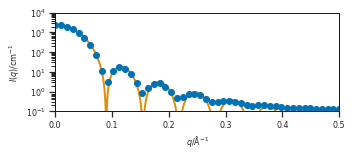

In [6]:
if in_ipynb():
    exp_file = '../data/theory/Experimental-sphere.txt'
else:
    exp_file = 'data/theory/Experimental-sphere.txt'

data = pd.read_csv(exp_file, delim_whitespace=True)

plt.figure(figsize=(5, 25/11))
plt.errorbar(data['<X>'], data['<Y>'], yerr=data['<Y>']*0.1, marker='o', ls='')
plt.yscale('log')
r = 50
q = np.linspace(data['<X>'].iloc[0], data['<X>'].iloc[-1], 1000)
a = sphere(r, q)
a *= data['<Y>'][0] / a[0]
plt.plot(q, a)
plt.ylim([0.1, 10000])
plt.xlim([0, 0.5])
plt.ylabel('$I(q)$/cm$^{-1}$')
plt.xlabel('$q$/Å$^{-1}$')
plt.tight_layout()
if in_ipynb():
    plt.show()
else:
    plt.savefig('reports/figures/theory/sphere.pdf')
    plt.close()

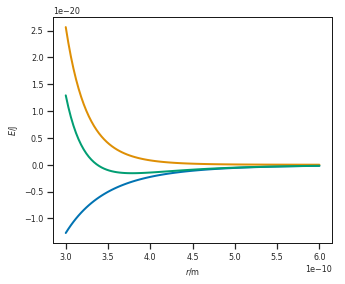

In [13]:
def attractive_energy(rij, b):
    return -b / np.power(rij, 6)

def repulsive_energy(rij, a):
    return a / np.power(rij, 12)

def lj_energy(rij, a, b):
    return repulsive_energy(rij, a) + attractive_energy(rij, b)

r = np.linspace(3e-10, 6e-10, 100)
fig = plt.figure(figsize=(5, 25/11))
ax = fig.add_subplot(111)
ax.plot(r, attractive_energy(r, 9.273e-78))
ax.plot(r, repulsive_energy(r, 1.363e-134))
ax.plot(r, lj_energy(r, 1.363e-134, 9.273e-78))
ax.set_xlabel(r'$r$/m')
ax.set_ylabel(r'$E$/J')
if in_ipynb():
    plt.show()
else:
    plt.savefig('reports/figures/theory/lj.pdf')
    plt.close()